<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/Rachel_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [3]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 68 (delta 20), reused 8 (delta 8), pack-reused 39 (from 1)
Receiving objects: 100% (68/68), 13.54 MiB | 6.91 MiB/s, done.
Resolving deltas: 100% (25/25), done.


# Q0.


1. What is the difference between regression and classification?

knn regression is for numeric variables where you select k of the nearest neighbors for the value you are trying to predict and determine the average value from the neigbors in order to make the prediction. knn classificaiton on the other hand is for catagorical variables where you again select k of the nearest neighbors for the value you are trying to predict, however you must decide to either report the most frequelty occuring value among the neighbors or report the probability distribution from the neighbors.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table, or confusion matrix, cross tabulates how close our predictions were to the true values from the data set. A confusion table is used to measure the performance of a classifier. It hels us understand the models accuracy by demonstrating what proportion of cases were correctly predicted by the model. It also shows if false positives or false negatives are more likley to result from the model which can be helpful to know if one of thse is worse (i.e. if the model is predicting the probability that an ice cream truck will drive by my appartment I would be really sad if it had a false positive and there was no ice cream, however a false negative would be a happy surprise, so I would want a model that had few false negatives and could see this with the confusion table)

3. What does the SSE quantify about a particular model?

SSE, or sum of squared errors, is a measure of how far the predicted values are from the true values. it does this by subtracting predicted value from the true value for each prediction squaring it and then summing them all together.

4. What are overfitting and underfitting?

overfitting is when the model is to complex/granular to be useful (i.e. it is to specific to the particularities of the training dataset). overfitting leads to specific predicitons that can change considerably with small changes to inputs. Somewhat counterintuitively to me at least, in the case of KNN overfitting happens when the K chosen is to small. Underfitting is when the model is to generalized to make useful/specific predictions.  Underfitting is when the model is too simple which leads to relativley uniform predictions regardless of the inputs. in the case of KNN underfutting occurs when the K chosen is too large, as the larger the K the closer predictions will be to just the average of the entire data set, which limmits the models ability to make specific predictions based on different inputs.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

If we did not split the data into training and testing sets we could overestimate the accuracy of the model as we are making predictions with the same data we used to train the model. Another issue we would run into with KNN specifically is that minimizing SSE to determing the best K for the model, we would find that the optimal K is 1 becuase that would be using the value in the data to predict itself. However this would not create a generalizable or useful model. Splitting the data into training and testing sets resolves these issues by allowing us to dertimne the optimal K using SSE by testing the model against data it was not trained on, so that we do not run into the issue of using data to predict themselves.  

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

One strength of reporting a probability distribution is that it is more nuanced and takes into account and reports information from all the neigbors such that the model is not falsly sure of its prediction. This is especially important if someone wanted to use the model to shape their decisions. For example if, for the prediction of rain vs no rain, given a set of inputs  6 neigbors are no rain and 5 are rain it would be useful to report a probability distribution of the class labels because even if it is most likly not going to rain you might still want to bring an umbrella just in case. On the other hand reporting a class label as a prediction could be useful if there were many possible class labels because it is more simple and easier to interpret. For example if our model was attempting to predict breed of cat with the possiblity of 100+ breeds it might be inefficent to report a probability distribution.



# Question 1:
This question is a case study for  𝑘  nearest neighbor regression, using the USA_cars_datasets.csv data.

The target variable y is price and the features are year and mileage.

1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cars = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
df_cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
df_cars_short = df_cars[['price','year','mileage']]
df_cars_short.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
df_cars_short.describe()
#there do not appear to be nas because the count of each variable is the same
#I am a little worried about the milage column's scale

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


2. Maxmin normalize year and mileage.

In [ ]:
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

In [ ]:
df_cars_short.dtypes


,0
price,int64
year,int64
mileage,int64


In [ ]:
#The target variable y is price and the features are year and mileage.
X = df_cars_short.loc[:,['year','mileage']]
X = X.apply(maxmin)
print(X.head())
print(X.describe())
y = df_cars_short['price']
print(y.head())

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000
0     6300
1     2899
2     5350
3    25000
4    27700
Name: price, dtype: int64


3. Split the sample into ~80% for training and ~20% for evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

N_train = len(y_train)
N_test = len(y_test)

4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . **For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
k=3
model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X,y) # Train the model on our data

In [ ]:
 def statics(k=3,data=df_cars_short): # This function replicates our previous work, with k as an input
  X = df_cars_short.loc[:,['year','mileage']]
  X = X.apply(maxmin)
  y = df_cars_short['price']
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
  fitted_model = model.fit(X,y) # Train the model on our data
  N_x = 100 # Coarseness of x variable
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot
  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values
  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors
  x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['price'] = y_hat # Add new variable to the dataframe
  # Create seaborn plot:
  this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',
                              hue='price',palette='crest',linewidth=0)
  sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [ ]:
#I used ai to debug this part
k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(X_train, y_train)
  y_pred = fitted_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error for k={k}: {mse}")

Mean Squared Error for k=3: 126446573.21822222
Mean Squared Error for k=10: 110802185.58681999
Mean Squared Error for k=25: 103170457.848608
Mean Squared Error for k=50: 99695443.96419598
Mean Squared Error for k=100: 98271058.96092059
Mean Squared Error for k=300: 100477298.914212


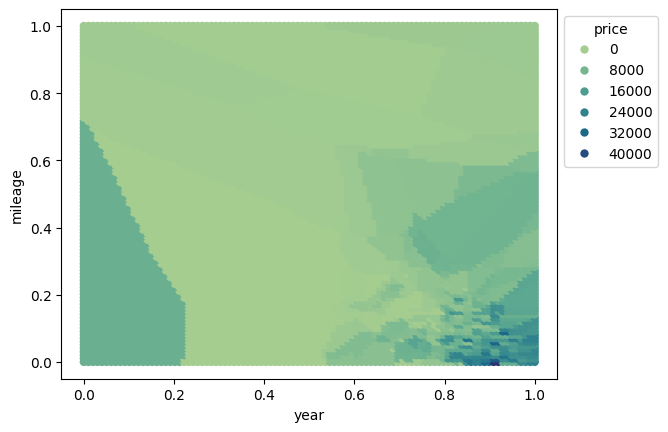

In [ ]:
statics(3)

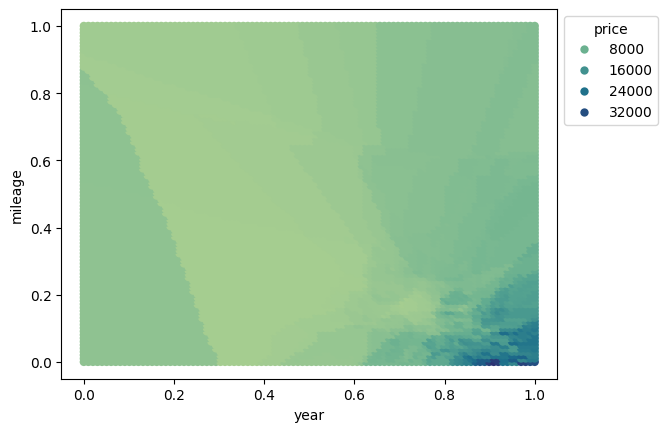

In [ ]:
statics(10)

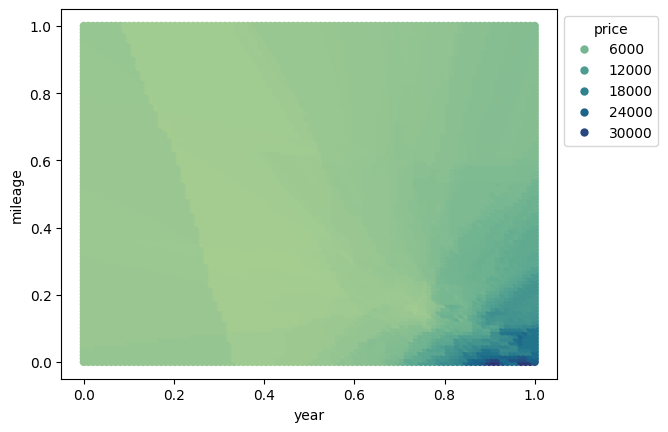

In [ ]:
statics(25)

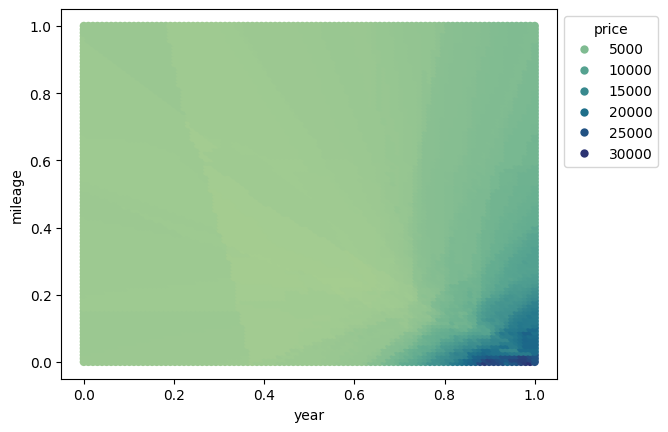

In [ ]:
statics(50)

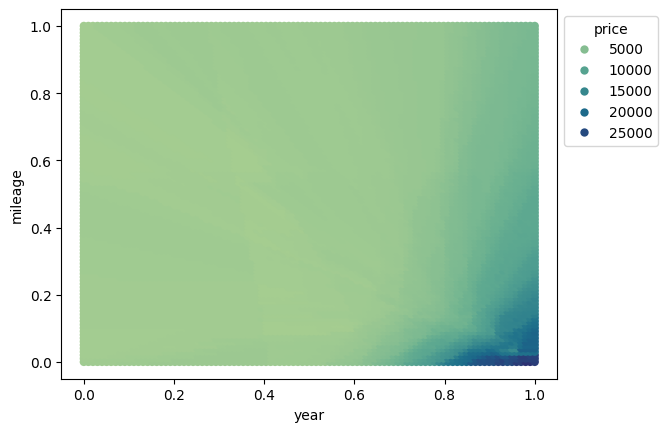

In [ ]:
statics(100)

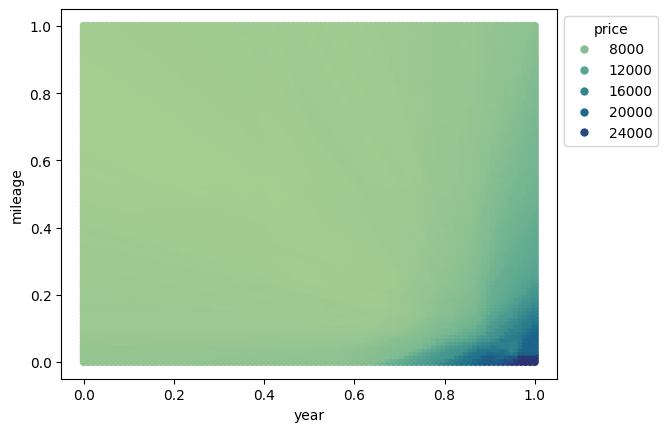

In [ ]:
statics(300)

5. Determine the optimal  𝑘  for these data.

In [ ]:
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[77]


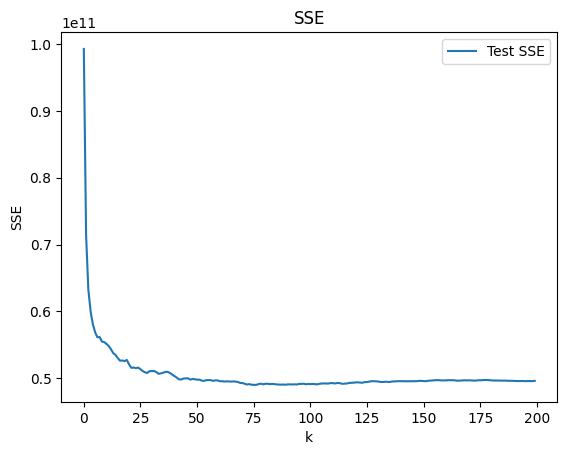

In [ ]:
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

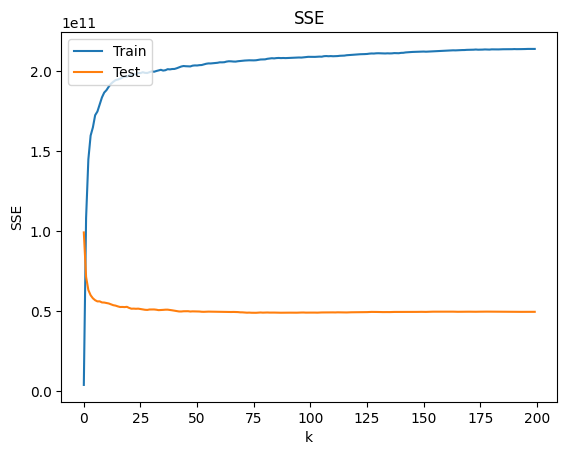

In [ ]:
plt.plot(np.arange(0,k_bar),SSE_on_train,label='Train') # Plot SSE by k
plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper left')
plt.title('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

The optimal K is 77 so for 100 and 300 the model overfitting and for 3, 10, and 25, and 50 the model is underfitting. with k=300 the model predicts basically the same thing regardless of the x inputs, and for k=3 and k=10 the predictions change a lot and very quikly with slight changes to the x inputs, this is too high of variance for predictions.
